# Sine
By Tanay Trivedi

In [1]:
import tensorflow as tf
import numpy as np
from math import pi

In [2]:
NUM_FEATURES = 6
BATCH_SIZE = 50
NUM_BATCHES = 1000


In [3]:
def f(x):
    # we are supposed to do the new gaussian function here
    
    w = tf.get_variable('w', [1,NUM_FEATURES], tf.float32,
                        tf.random_uniform_initializer())
    mu = tf.get_variable('mu', [NUM_FEATURES,1], tf.float32,
                        tf.random_normal_initializer())
    sigma = tf.get_variable('sigma', [NUM_FEATURES,1], tf.float32,
                        tf.random_uniform_initializer())
    b = tf.get_variable('b', [], tf.float32, tf.zeros_initializer())
    
    gaussian= tf.exp(-1*(x-mu)**2/sigma**2)
    return tf.matmul(w, gaussian) + b

In [4]:
x = tf.placeholder(tf.float32, [])
y = tf.placeholder(tf.float32, [])
y_hat = f(x)

loss = tf.reduce_mean(0.5*tf.pow(y_hat - y, 2))
optim = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
init = tf.global_variables_initializer()

In [6]:
x_vals = np.random.uniform(0.0, 1.0, BATCH_SIZE) 
y_vals = np.sin(pi*2*x_vals) + np.random.normal(0, 0.1, BATCH_SIZE) 

In [7]:
sess = tf.Session()
sess.run(init)

for _ in range(NUM_BATCHES):
    for xx, yy in zip(x_vals, y_vals):
        sess.run(optim, feed_dict={x: xx, y: yy})

In [8]:
var_estimates={}
for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    var_estimates[var.name.rstrip(":0")]=np.array(sess.run(var)).flatten()

In [9]:
var_estimates["w"]

array([-1.0620766 ,  0.305824  ,  0.69310725,  0.02717198,  1.0633641 ,
        1.1043007 ], dtype=float32)

In [10]:
pass_through=np.linspace(0,1,num=100)

In [11]:
predict=[]
for i in pass_through:
    predict.append(sess.run(y_hat, feed_dict={x:i}))

In [12]:
predict=np.array(predict)

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

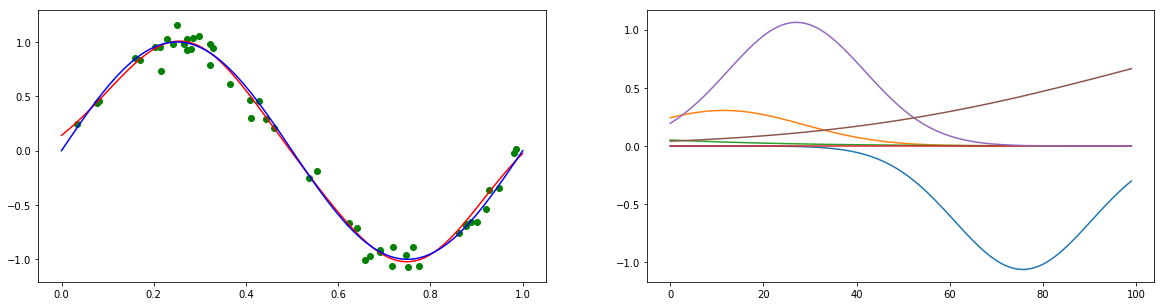

In [15]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax1.plot(pass_through,predict[:,0].flatten(),"r-")
ax1.plot(pass_through,np.sin(2*pi*pass_through),"b")
ax1.scatter(x_vals,y_vals,c="g")

ax2 = fig.add_subplot(122)
for i in range(NUM_FEATURES):
    ax2.plot(var_estimates["w"][i]*np.exp(-(pass_through-var_estimates["mu"][i])**2/var_estimates["sigma"][i]**2))